<a href="https://colab.research.google.com/github/iiTsSUgar/Tugas-1-AI/blob/main/TUGAS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   distance_to_office  wake_up_time  sleep_duration traffic_condition  \
0           19.352466      6.177701        5.593683             Heavy   
1           47.585001      4.664656        6.916894             Heavy   
2           36.867703      6.380198        5.495280          Moderate   
3           30.334266      6.610586        7.760056             Light   
4            8.644913      6.559790        7.082440          Moderate   

  day_of_week  is_late  
0     Tuesday        1  
1     Tuesday        1  
2   Wednesday        1  
3   Wednesday        1  
4     Tuesday        0  
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.98      1.00      0.99       131

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



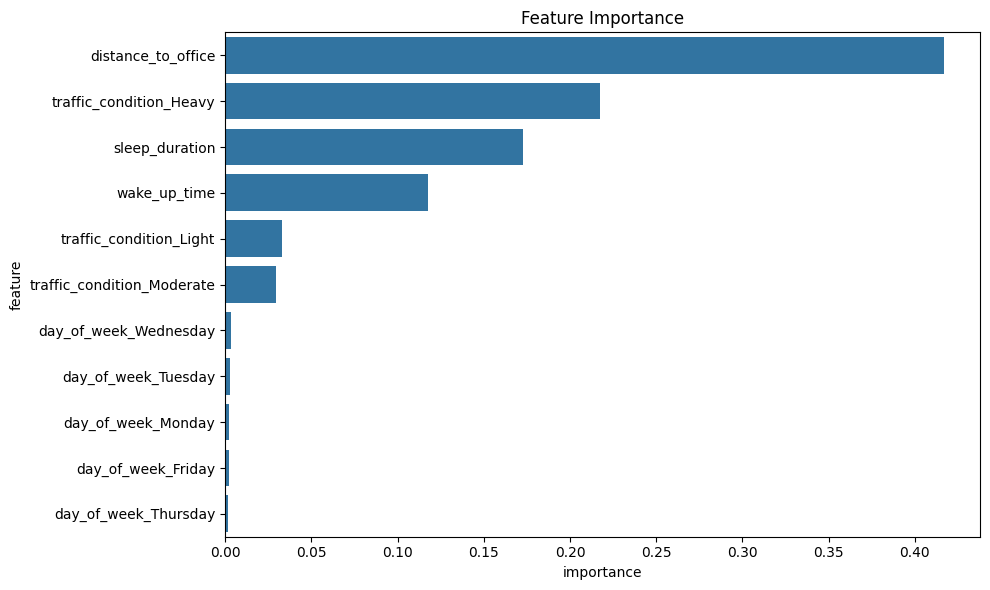

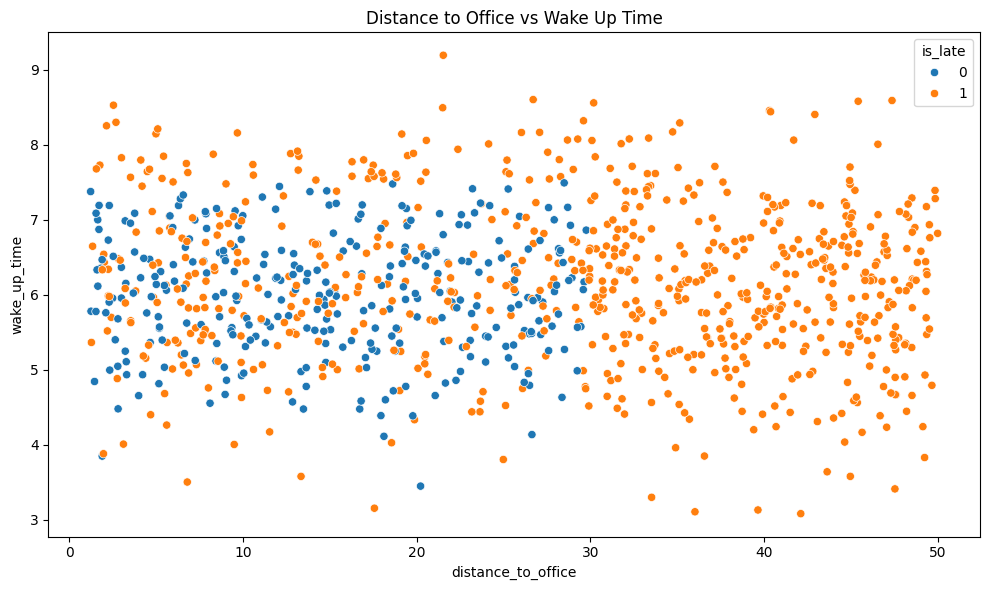

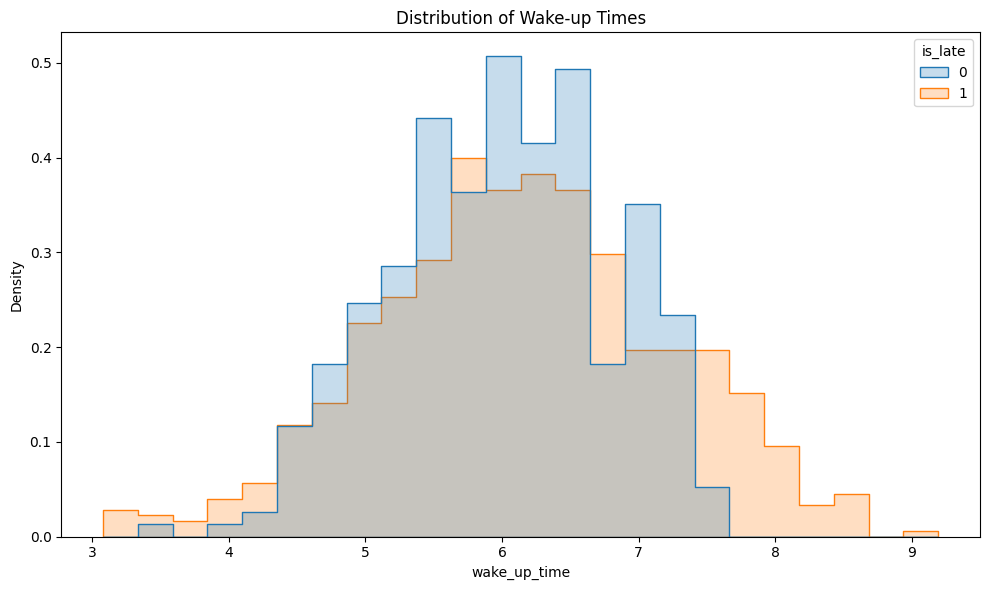

In [ ]:
# Employee Tardiness Prediction using Machine Learning
# Nama: Muhammad Aulia Nizar Rahman
# NIM: 20210801232

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

data = {
    'distance_to_office': np.random.uniform(1, 50, n_samples),
    'wake_up_time': np.random.normal(6, 1, n_samples),
    'sleep_duration': np.random.normal(7, 1, n_samples),
    'traffic_condition': np.random.choice(['Light', 'Moderate', 'Heavy'], n_samples),
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], n_samples),
}

df = pd.DataFrame(data)

# Create target variable (late or not)
df['is_late'] = (
    (df['distance_to_office'] > 30) |
    (df['wake_up_time'] > 7.5) |
    (df['sleep_duration'] < 6) |
    (df['traffic_condition'] == 'Heavy')
).astype(int)

# Display the first few rows of the dataset
print(df.head())

# Prepare features and target
X = df.drop('is_late', axis=1)
y = df['is_late']

# Encode categorical variables
X = pd.get_dummies(X, columns=['traffic_condition', 'day_of_week'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Visualize the relationship between distance to office and tardiness
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_office', y='wake_up_time', hue='is_late')
plt.title('Distance to Office vs Wake Up Time')
plt.tight_layout()
plt.show()

# Visualize the distribution of wake-up times for late and on-time employees
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='wake_up_time', hue='is_late', element='step', stat='density', common_norm=False)
plt.title('Distribution of Wake-up Times')
plt.tight_layout()
plt.show()